In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# datasets
dirty_train1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_acm_train.tsv", sep="\t")
dirty_train2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_scholar_train.tsv", sep="\t")
dirty_train3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_amazon_train.tsv", sep="\t")
dirty_train4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_walmart_train.tsv", sep="\t")
clean_train1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_acm_train.tsv", sep="\t")
clean_train2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_scholar_train.tsv", sep="\t")
clean_train3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_amazon_train.tsv", sep="\t")
clean_train4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_walmart_train.tsv", sep="\t")
dirty_test1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_acm_test.tsv", sep="\t")
dirty_test2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_scholar_test.tsv", sep="\t")
dirty_test3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_amazon_test.tsv", sep="\t")
dirty_test4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_walmart_test.tsv", sep="\t")
clean_test1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_acm_test.tsv", sep="\t")
clean_test2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_scholar_test.tsv", sep="\t")
clean_test3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_amazon_test.tsv", sep="\t")
clean_test4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_walmart_test.tsv", sep="\t")

In [3]:
# character based
def charDistance(s1,s2):
    # get the length of the strings
    m = len(s1)
    n = len(s2)
    # if some of them are empty, return the longer length of them
    if (m==0|n==0):
        return max(m,n)
    # create an empty matrix to store the calculation result
    A = np.zeros((m+1,n+1))
    # initialize the first row and column
    for i in range(0,m+1):
        A[i][0]=i
    for j in range(1,n+1):
        A[0][j]=j
    # calculate the distance column by column
    for j in range(1,n+1):
        for i in range(1,m+1):
            if (s1[i-1]==s2[j-1]):
                d=0
            else: d=1
            A[i][j]=min(A[i-1][j]+1,A[i][j-1]+1,A[i-1][j-1]+d)
    # return the final result
    return A[m][n]/max(m,n)

def prediction(dist_list, threshold):
    pre_list = [0]*len(dist_list)
    for i in range(len(dist_list)):
        if dist_list[i]<threshold:
            pre_list[i] = 1
    return pre_list

def getDistanceChar(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = charDistance(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

def toInt(list):
    result = []
    for i in range(len(list)):
        b = int(list[i])
        result.append(b)
    return result

def max_threshold(dist, real):
    max_f = 0
    max_t = 0
    threshold_list = np.linspace(0,1,101)
    for i in range(len(threshold_list)):
        pre_list = prediction(dist, threshold_list[i])
        pre = toInt(pre_list)
        f = f1_score(real, pre, average='binary')
        if f>max_f:
            max_f = f
            max_t = threshold_list[i]
    return max_t, max_f

def toStr(list):
    result = []
    for i in range(len(list)):
        a = str(list[i])
        result.append(a)
    return result

amazon itunes clean character based method
threshold of the training set is:0.59
f1 score of training set is:0.4916666666666667
f1 score of the testing set is:0.4675324675324675
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        82
           1       0.36      0.67      0.47        27

    accuracy                           0.62       109
   macro avg       0.60      0.64      0.59       109
weighted avg       0.73      0.62      0.65       109

[[50 32]
 [ 9 18]]


<AxesSubplot:>

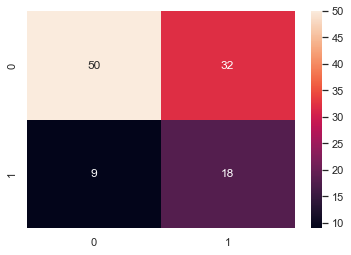

In [4]:
# amazon itunes clean character based
dist_train_char_3_1 = getDistanceChar(clean_train3['text_left'], clean_train3['text_right'])
real_train3_1 = toInt(clean_train3['label'])
t_train_char_3_1, f_train_char_3_1 = max_threshold(dist_train_char_3_1, real_train3_1)
print('amazon itunes clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_3_1))
print('f1 score of training set is:{}'.format(f_train_char_3_1))
dist_test_char_3_1 = getDistanceChar(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_char_3_1 = prediction(dist_test_char_3_1, t_train_char_3_1)
pre_char_3_1 = toInt(pre_list_char_3_1)
f_test_char_3_1 = f1_score(real_test3_1, pre_char_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_3_1))
print(classification_report(real_test3_1, pre_char_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_char_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

amazon itunes dirty character based method
threshold of the training set is:0.71
f1 score of training set is:0.4803149606299213
f1 score of the testing set is:0.41304347826086957
              precision    recall  f1-score   support

           0       0.82      0.44      0.57        82
           1       0.29      0.70      0.41        27

    accuracy                           0.50       109
   macro avg       0.56      0.57      0.49       109
weighted avg       0.69      0.50      0.53       109

[[36 46]
 [ 8 19]]


<AxesSubplot:>

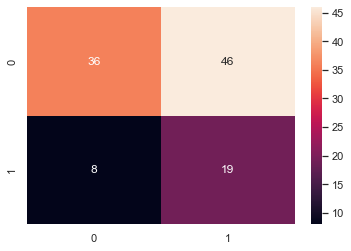

In [7]:
# amazon itunes dirty character based
dist_train_char_3_2 = getDistanceChar(dirty_train3['text_left'], dirty_train3['text_right'])
real_train3_2 = toInt(dirty_train3['label'])
t_train_char_3_2, f_train_char_3_2 = max_threshold(dist_train_char_3_2, real_train3_2)
print('amazon itunes dirty character based method')
print('threshold of the training set is:{}'.format(t_train_char_3_2))
print('f1 score of training set is:{}'.format(f_train_char_3_2))
dist_test_char_3_2 = getDistanceChar(dirty_test3['text_left'], dirty_test3['text_right'])
real_test3_2 = toInt(dirty_test3['label'])
pre_list_char_3_2= prediction(dist_test_char_3_2, t_train_char_3_2)
pre_char_3_2 = toInt(pre_list_char_3_2)
f_test_char_3_2 = f1_score(real_test3_2, pre_char_3_2, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_3_2))
print(classification_report(real_test3_2, pre_char_3_2))
sns.set()
C2= confusion_matrix(real_test3_2, pre_list_char_3_2, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

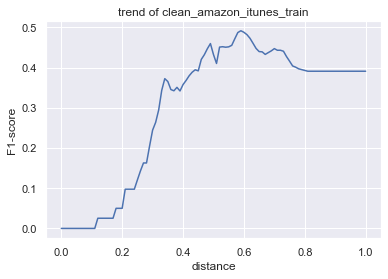

In [11]:
threshold_list = np.linspace(0,1,101)
count3 = []
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train_char_3_1, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real_train3_1, pre, average='binary')
    count3.append(f)
    
plt.plot(threshold_list,count3)
plt.xlabel("distance")
plt.ylabel("F1-score")
plt.title("trend of clean_amazon_itunes_train")
plt.show()

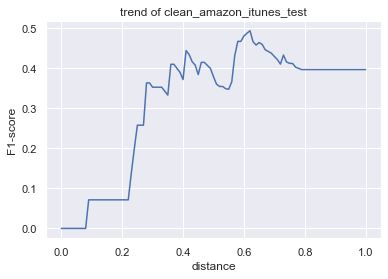

In [13]:
threshold_list = np.linspace(0,1,101)
count5 = []
for i in range(len(threshold_list)):
    pre_list = prediction(dist_test_char_3_1, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real_test3_1, pre, average='binary')
    count5.append(f)
    
plt.plot(threshold_list,count5)
plt.xlabel("distance")
plt.ylabel("F1-score")
plt.title("trend of clean_amazon_itunes_test")
plt.show()

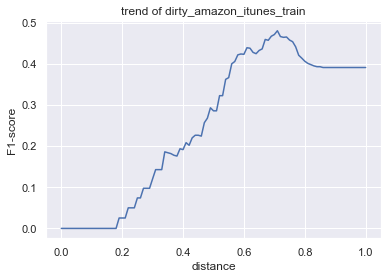

In [12]:
threshold_list = np.linspace(0,1,101)
count4 = []
for i in range(len(threshold_list)):
    pre_list = prediction(dist_train_char_3_2, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real_train3_2, pre, average='binary')
    count4.append(f)
    
plt.plot(threshold_list,count4)
plt.xlabel("distance")
plt.ylabel("F1-score")
plt.title("trend of dirty_amazon_itunes_train")
plt.show()

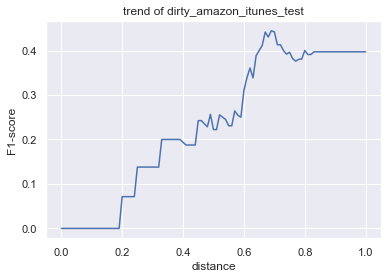

In [14]:
threshold_list = np.linspace(0,1,101)
count6 = []
for i in range(len(threshold_list)):
    pre_list = prediction(dist_test_char_3_2, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real_test3_2, pre, average='binary')
    count6.append(f)
    
plt.plot(threshold_list,count6)
plt.xlabel("distance")
plt.ylabel("F1-score")
plt.title("trend of dirty_amazon_itunes_test")
plt.show()